# Online Shoppers Purchasing Intention

## 大綱
* Dataset source: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset?fbclid=IwAR3I17RwS19zbmMSPf9-vlil5jduxOQ0XcFRaW-JdZ9n33GPBOR5gDSjnTw
* 套件
* 觀察與分析
* 預測目標:預測是否有 Revenue
* 預處理
* 訓練
* 測試

## 套件

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具

/home/arielwu/.local/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## 觀察與分析
* 沒有缺失資料
* Attributes
    * Administrative
    * Administrative_Duration
    * Informational
    * Informational_Duration
    * ProductRelated
    * ProductRelated_Duration
    * BounceRates : 跳出率
    * ExitRates : 離開率
    * PageValues : 網頁價值
    * SpecialDay : 會在特別日子的前後拜訪網站
    * Month
    * OperatingSystems
    * Browser
    * TrafficType
    * VisitorType
        * Returning_Visitor : True
        * New_Visitor : False
    * Weekend
    * Revenue

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')
df.VisitorType.replace('Returning_Visitor', True, inplace=True)
df.VisitorType.replace('New_Visitor', False, inplace=True)
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [3]:
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,True,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,True,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,True,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,True,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,True,True,False


### BounceRates vs ExitRates
* 正比關係

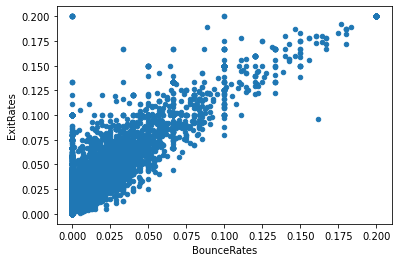

In [4]:
df.plot.scatter('BounceRates', 'ExitRates')

### Revenue vs ProductRelated_Duration
* 沒有什麼相關性

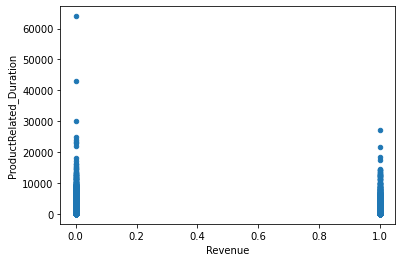

In [5]:
df.Revenue.replace(False, 0, inplace=True)
df.Revenue.replace(True, 1, inplace=True)
df.plot.scatter('Revenue', 'ProductRelated_Duration')

### Revenue vs BounceRates
* 有相關性

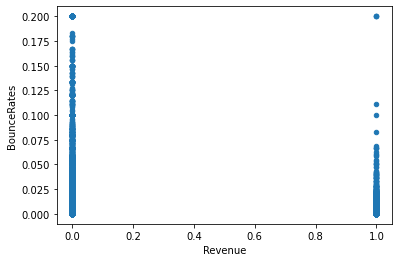

In [6]:
df.plot.scatter('Revenue', 'BounceRates')

### Revenue vs ExitRates
* 有相關性

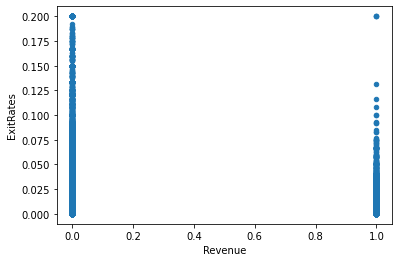

In [7]:
df.plot.scatter('Revenue', 'ExitRates')

### Revenue vs Weekend
* 不是 weekend 的數量比較多
* 用比例算,可以發現 weekend 並不會影響 Revenue

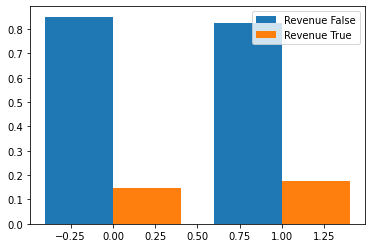

In [8]:
df.Weekend.replace(False, 0, inplace=True)
df.Weekend.replace(True, 1, inplace=True)
w1 = df[df.Weekend == 1]
w0 = df[df.Weekend == 0]
a = w0[w0.Revenue == 0].shape[0]
b = w0[w0.Revenue == 1].shape[0]
c = w1[w1.Revenue == 0].shape[0]
d = w1[w1.Revenue == 1].shape[0]
# print(w0.shape[0],w1.shape[0],a,b,c,d)
x1 = [0,1] # weekend
y1 = [a/w0.shape[0],c/w1.shape[0]] # no revenue
y2 = [b/w0.shape[0],d/w1.shape[0]] # revenue
width = 0.4
plt.bar([i-width/2 for i in x1], y1, width=width, label='Revenue False')
plt.bar([i+width/2 for i in x1], y2, width=width, label='Revenue True')
plt.legend()
plt.show()

### Revenue vs VisitorType
* 用比例算,可以發現 VisitorType 為 New_Visitor 時有較高趴數會有人下單

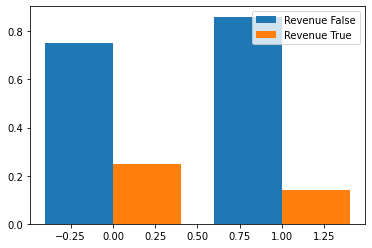

In [9]:
df.VisitorType.replace(False, 0, inplace=True)
df.VisitorType.replace(True, 1, inplace=True)
w1 = df[df.VisitorType == 1]
w0 = df[df.VisitorType == 0]
a = w0[w0.Revenue == 0].shape[0]
b = w0[w0.Revenue == 1].shape[0]
c = w1[w1.Revenue == 0].shape[0]
d = w1[w1.Revenue == 1].shape[0]
# print(w0.shape[0],w1.shape[0],a,b,c,d)
x1 = [0,1] # weekend
y1 = [a/w0.shape[0],c/w1.shape[0]] # New_Visitor
y2 = [b/w0.shape[0],d/w1.shape[0]] # Returning_Visitor
width = 0.4
plt.bar([i-width/2 for i in x1], y1, width=width, label='Revenue False')
plt.bar([i+width/2 for i in x1], y2, width=width, label='Revenue True')
plt.legend()
plt.show()

## 預測目標
* 預測是否有 Revenue
* 輸入參數:
    * BounceRates : 跳出率
    * ExitRates : 離開率
    * VisitorType
        * Returning_Visitor : True
        * New_Visitor : False

## 預處理

In [10]:
df = pd.read_csv('online_shoppers_intention.csv')
# df.VisitorType.replace('Returning_Visitor',1, inplace=True)
# df.VisitorType.replace('New_Visitor', 0, inplace=True)
df.Revenue.replace(True, 1, inplace=True)
df.Revenue.replace(False, 0, inplace=True)
train_x = df[['BounceRates', 'ExitRates', 'VisitorType']]         # 取出訓練資料需要分析的資料欄位
other = pd.DataFrame(np.zeros(train_x.shape[0]).reshape((train_x.shape[0],1)),columns=['VisitorType'])
train_x.drop(['VisitorType'],axis=1,inplace=True)
train_x = pd.concat([train_x,other], axis=1)
train_y = df['Revenue']                       # 取出訓練資料的答案
train_x.describe()

/home/arielwu/.local/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,BounceRates,ExitRates,VisitorType
count,12330.000000,12330.000000,12330.0
mean,0.022191,0.043073,0.0
std,0.048488,0.048597,0.0
min,0.000000,0.000000,0.0
25%,0.000000,0.014286,0.0
50%,0.003112,0.025156,0.0
75%,0.016813,0.050000,0.0
max,0.200000,0.200000,0.0


In [11]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BounceRates  12330 non-null  float64
 1   ExitRates    12330 non-null  float64
 2   VisitorType  12330 non-null  float64
dtypes: float64(3)
memory usage: 289.1 KB


In [12]:
train_y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12325    0.0
12326    0.0
12327    0.0
12328    0.0
12329    0.0
Name: Revenue, Length: 12330, dtype: float64

## 訓練
* 使用決策樹
* 在一開始時,我並沒有設定任何參數,結果出來後,雖然訓練結果佳,但預測結果不太好,有點 overfitting, 後來我設定了參數,不要讓樹的深度太深,後來結果約84%
* 還有用 Logistic Regression 結果和 模型2 差不多

In [13]:
# 模型訓練1

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
    
    model = DecisionTreeClassifier(random_state=1012)
    
    model.fit(train_x_split, train_y_split)           # 訓練決策樹模型
    
    train_pred_y = model.predict(train_x_split)       # 確認模型是否訓練成功
    train_acc = accuracy_score(train_y_split,         # 計算訓練資料準確度
                               train_pred_y)
    valid_pred_y = model.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_acc = accuracy_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred_y)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

print((
    'average train accuracy: {}\n' +
    '    min train accuracy: {}\n' +
    '    max train accuracy: {}\n' +
    'average valid accuracy: {}\n' +
    '    min valid accuracy: {}\n' +
    '    max valid accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

model = DecisionTreeClassifier(random_state=1012,
                               criterion='gini',                           
                               max_depth=5,       # 設定最大深度為 5
                               max_leaf_nodes=2 ** 5) # 設定最多葉子個數為 32
model.fit(train_x, train_y)                       # 訓練決策樹模型

pred_y = model.predict(train_x)                   # 確認模型是否訓練成功
acc = accuracy_score(train_y, pred_y)             # 計算準確度

print('accuracy: {}'.format(acc))                 # 輸出準確度

average train accuracy: 0.9301500405515004
    min train accuracy: 0.9281224655312247
    max train accuracy: 0.9330900243309003
average valid accuracy: 0.7954582319545823
    min valid accuracy: 0.7814274128142741
    max valid accuracy: 0.8114355231143552
accuracy: 0.8461476074614761


In [14]:
# 模型訓練2

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
    
    model = DecisionTreeClassifier(random_state=1012,
                                   criterion='gini',                           
                                   max_depth=5,       # 設定最大深度為 5
                                   max_leaf_nodes=2 ** 5)
    
    model.fit(train_x_split, train_y_split)           # 訓練決策樹模型
    
    train_pred_y = model.predict(train_x_split)       # 確認模型是否訓練成功
    train_acc = accuracy_score(train_y_split,         # 計算訓練資料準確度
                               train_pred_y)
    valid_pred_y = model.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_acc = accuracy_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred_y)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

print((
    'average train accuracy: {}\n' +
    '    min train accuracy: {}\n' +
    '    max train accuracy: {}\n' +
    'average valid accuracy: {}\n' +
    '    min valid accuracy: {}\n' +
    '    max valid accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

model = DecisionTreeClassifier(random_state=1012,
                               criterion='gini',                           
                               max_depth=5,       # 設定最大深度為 5
                               max_leaf_nodes=2 ** 5) # 設定最多葉子個數為 32
model.fit(train_x, train_y)                       # 訓練決策樹模型

pred_y = model.predict(train_x)                   # 確認模型是否訓練成功
acc = accuracy_score(train_y, pred_y)             # 計算準確度

print('accuracy: {}'.format(acc))                 # 輸出準確度

average train accuracy: 0.8465733982157339
    min train accuracy: 0.8429643146796432
    max train accuracy: 0.8495539334955393
average valid accuracy: 0.8429845904298459
    min valid accuracy: 0.8333333333333334
    max valid accuracy: 0.8580697485806975
accuracy: 0.8461476074614761


In [15]:
# 模型訓練3

from sklearn.linear_model import LogisticRegression

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
    
    model = LogisticRegression(random_state=1012)
    
    model.fit(train_x_split, train_y_split)           # 訓練決策樹模型
    
    train_pred_y = model.predict(train_x_split)       # 確認模型是否訓練成功
    train_acc = accuracy_score(train_y_split,         # 計算訓練資料準確度
                               train_pred_y)
    valid_pred_y = model.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_acc = accuracy_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred_y)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

print((
    'average train accuracy: {}\n' +
    '    min train accuracy: {}\n' +
    '    max train accuracy: {}\n' +
    'average valid accuracy: {}\n' +
    '    min valid accuracy: {}\n' +
    '    max valid accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

model = DecisionTreeClassifier(random_state=1012,
                               criterion='gini',                           
                               max_depth=5,       # 設定最大深度為 5
                               max_leaf_nodes=2 ** 5) # 設定最多葉子個數為 32
model.fit(train_x, train_y)                       # 訓練決策樹模型

pred_y = model.predict(train_x)                   # 確認模型是否訓練成功
acc = accuracy_score(train_y, pred_y)             # 計算準確度

print('accuracy: {}'.format(acc))                 # 輸出準確度

average train accuracy: 0.8452554744525548
    min train accuracy: 0.8418491484184915
    max train accuracy: 0.8480332522303325
average valid accuracy: 0.8452554744525548
    min valid accuracy: 0.8341443633414436
    max valid accuracy: 0.8588807785888077
accuracy: 0.8461476074614761
